# Heart Disease Classification Project

Tools used:
1. numpy 
2. pandas
3. scikit-learn
4. matplotlib

The aim of this project is to create a model that effectively predict whether a patient has a heart disease or not based on the given features.
Following approach taken:
1. problem definition
2. Evaluate what is considered success
3. Data exploration
4. Select Features
5. Modeling
6. Experimenting

## Problem Definition: 
Given clinical parameter about a patient, can we predict whether he/she as a heart disease?

## Evaluation
The model is considered successful if we reached at least 95% accuracy

## EDA

In [1]:
#importing the packages for EDA
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing models from scikitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#importing evaluation and miscellanious
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline

In [2]:
#reading the data and first look
df = pd.read_csv("heart-disease(2).csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Description of each feature and label
Column Descriptions:


1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. target: 0 = no disease, 1 = disease


## Explatory Data Analysis

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].unique()

array([1, 0])

In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Initial look:
- The data has no null values, hence dropping rows or transforming null rows is not needed
- About 54% of the data have a positive output for heart disease and 46% have a negative output

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

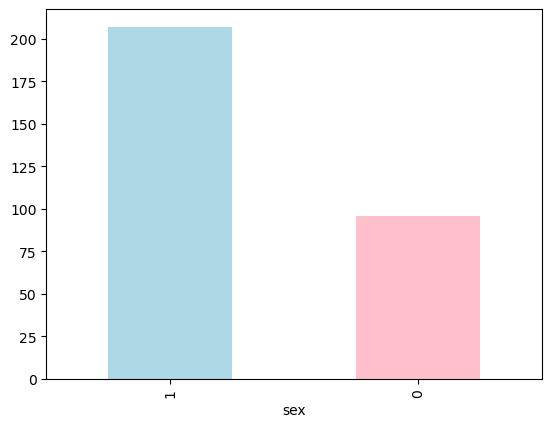

In [10]:
df.sex.value_counts().plot(kind='bar',color=['lightblue','pink'])
plt.show()

Male compose more than half the data, which makes the model more biased towards male and will generate more accurate results for male patients than female

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


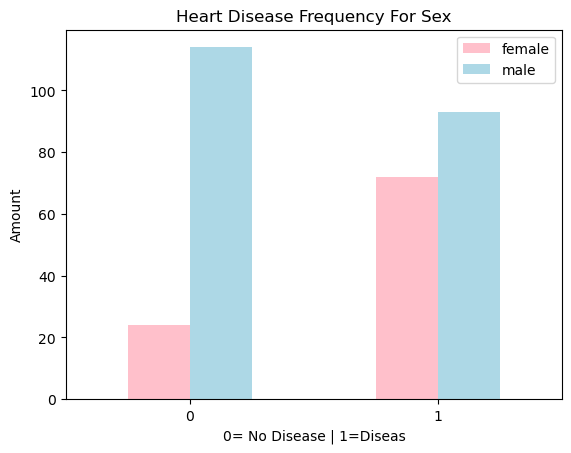

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=['pink','lightblue'])
plt.title("Heart Disease Frequency For Sex")
plt.ylabel('Amount')
plt.xlabel('0= No Disease | 1=Diseas')
plt.legend(['female','male'])
plt.xticks(rotation=0)
plt.show()

This cross tab shows that if the patient was a women the model will predict she has a disease by a 75% chance based on the existing dataset. If the participant is male the model will predict that the patient has a heart disease almost half the time

In [13]:
hasDisease = df[df['target']==1]
noHeartDis = df[df['target']==0]

In [14]:
hasDisease['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38])

In [15]:
hasDisease['age'].min(),hasDisease['age'].max()

(29, 76)

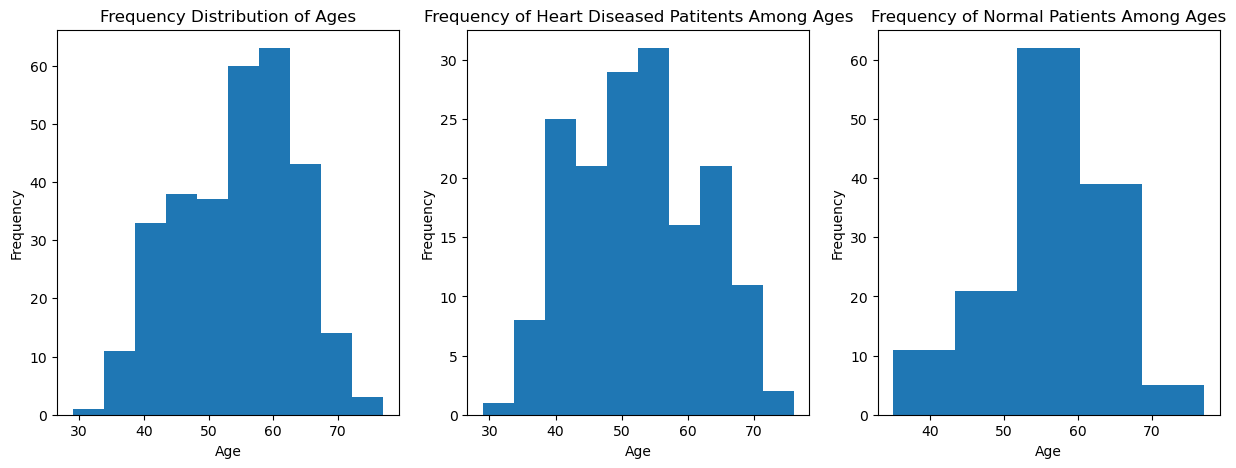

In [16]:
fig1, ((f1ax1,f1ax2,f1ax3)) = plt.subplots(figsize=(15,5),nrows=1,ncols=3)
f1hist = f1ax1.hist(df['age'],bins=10)
f1ax1.set(
    title='Frequency Distribution of Ages',
    xlabel='Age',
    ylabel='Frequency'
)
f2hist = f1ax2.hist(hasDisease['age'],bins=10)
f1ax2.set(
    title='Frequency of Heart Diseased Patitents Among Ages',
    xlabel='Age',
    ylabel='Frequency'
)
f3hist = f1ax3.hist(noHeartDis['age'],bins=5)
f1ax3.set(
    title= 'Frequency of Normal Patients Among Ages',
    xlabel='Age',
    ylabel='Frequency'
)
plt.show()

By looking at the distrubution of the data, most of the data collected concentrates at at the age range of 50-60. Most of the Heart Diseaed patietns are located around the half of the range 50-60 years old, similar most normal patients who are located at the end of the range of 50-60 years old. No data is found to be less than 30 or greater than 80 which might cause the model to give inaccurate results when inputing ages at these ranges; however it is expected that the model will provide reasonable results if the inputted age was between 40 and 70 with best results at the age range of 50-60 

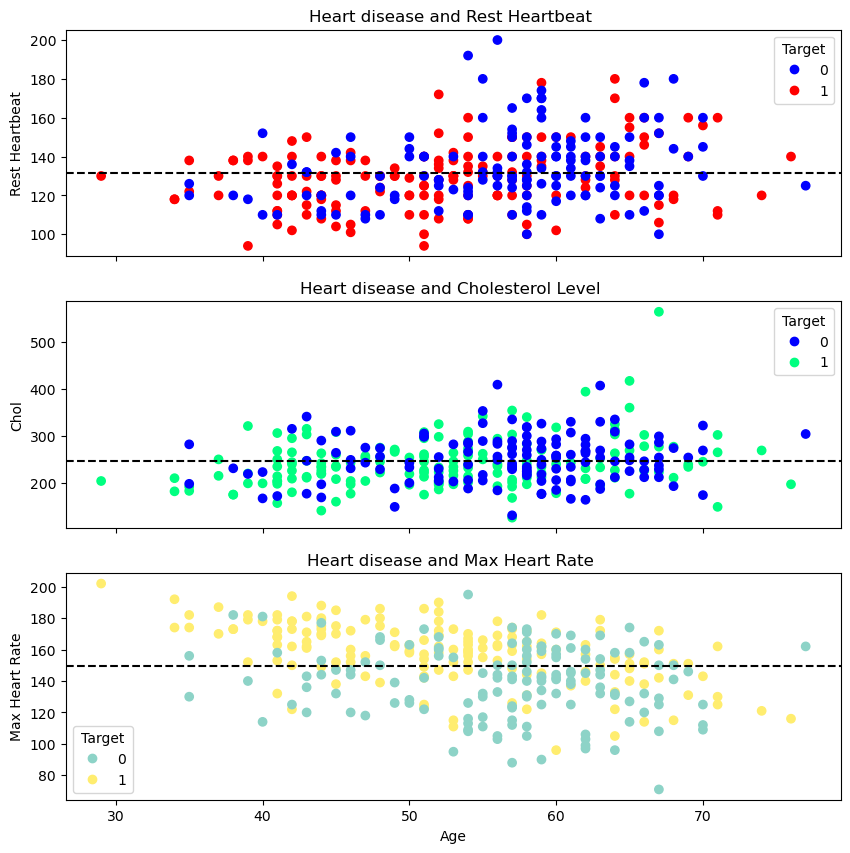

In [17]:
fg2,(f2ax1,f2ax2,f2ax3) = plt.subplots(figsize=(10,10),nrows=3,ncols=1,sharex=True)


f2sc1 = f2ax1.scatter(df['age'],df['trestbps'],c=df['target'],cmap='bwr')
f2sc2 = f2ax2.scatter(df['age'],df['chol'],c=df['target'],cmap='winter')
f2sc3 = f2ax3.scatter(df['age'],df['thalach'],c=df['target'],cmap='Set3')

#Drawing the mean line
f2ax1.axhline(y=df['trestbps'].mean(),linestyle='--',color='black')
f2ax2.axhline(y=df['chol'].mean(),linestyle='--',color='black')
f2ax3.axhline(y=df['thalach'].mean(),linestyle='--',color='black')
#Desigining the figure
f2ax1.set(
    title="Heart disease and Rest Heartbeat ",
    ylabel="Rest Heartbeat"
)
f2ax2.set(
    title="Heart disease and Cholesterol Level ",
    ylabel="Chol"
)
f2ax3.set(
    title="Heart disease and Max Heart Rate ",
    ylabel="Max Heart Rate",
    xlabel='Age'
)

f2ax1.legend(*f2sc1.legend_elements(),title="Target")
f2ax2.legend(*f2sc2.legend_elements(),title="Target")
f2ax3.legend(*f2sc3.legend_elements(),title="Target")
plt.show()

From the figures above what can be easily detected is that when the Max Heart Rate is above average, it is more likely that the patient is affected with a heart disease. The other 2 features are somehow equally distrbuted. The best feature among the three to predict whether the patient has heart disease or not is the thalach(Max Heart Rate)

### Heart Disease Frequency per Chest Pain Type
Chest pain type
* 0:Typical angina: chest pain related decrease blood supply to the heart
* 1:Atypical angina: chest pain not related to heart
* 2:Non-anginal pain: typically esophageal spasms (non heart related)
* 3:Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


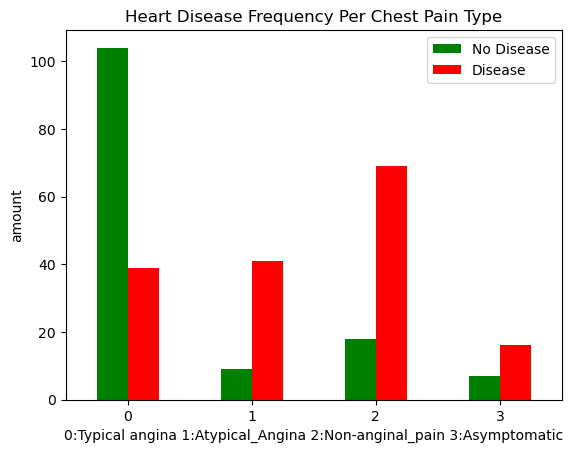

In [19]:
pd.crosstab(df.cp,df.target).plot(kind=("bar"),color=['green','red'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.ylabel('amount')
plt.xlabel('0:Typical angina 1:Atypical_Angina 2:Non-anginal_pain 3:Asymptomatic')
plt.xticks(rotation=0)
plt.legend(['No Disease',"Disease"])
plt.show()

What is unusual is that patients with non-angial pain(non-heart related) are more likely to be predicted as having heart disease 

### Correlation Matrix

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


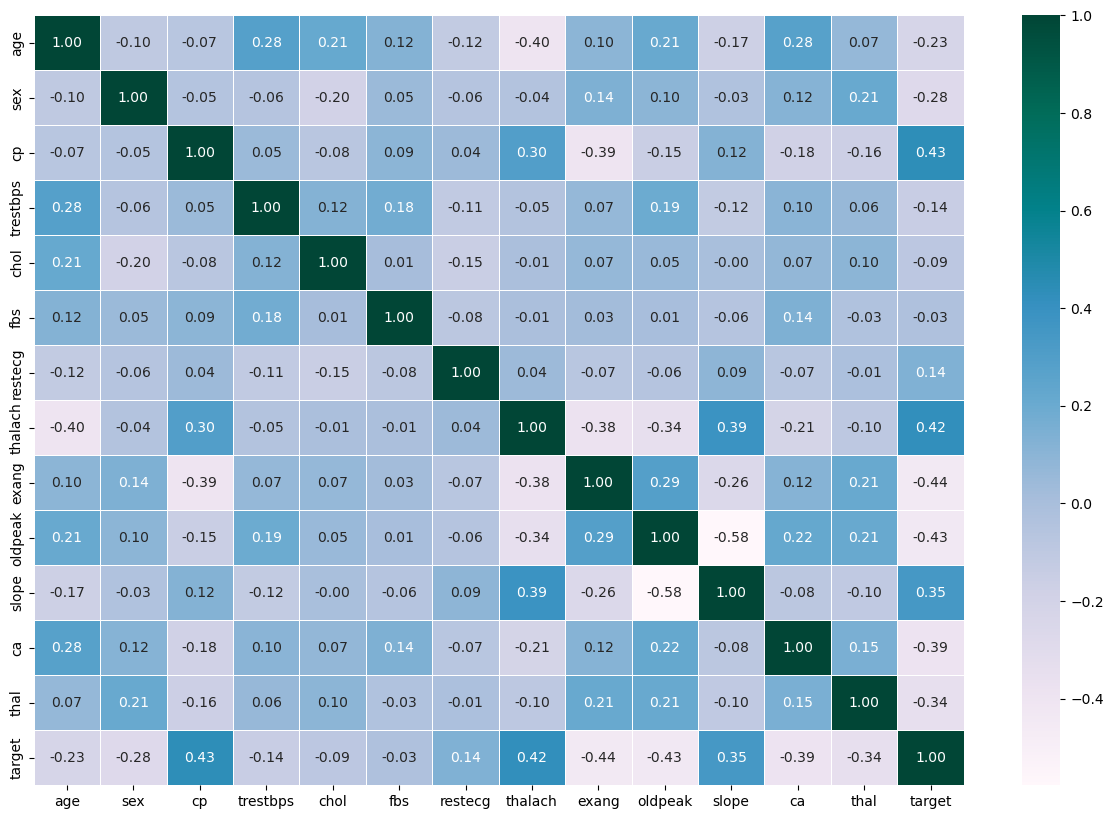

In [21]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True, linewidths=0.5,fmt='.2f',cmap='PuBuGn')

## Preparing Data

In [22]:

np.random.seed(42)
x = df.drop("target",axis=1)
y = df["target"]
#Splitting data into train and test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

## Preparing Models

In [23]:

models={
    "Random Forest Classifer": RandomForestClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Logisitc Regression": LogisticRegression(),
    "SVC": SVC(),
    "Linear SVC": LinearSVC()
}

results={}
#helper function for fitting model
def fit_score_model(model,model_name,xtrain,xtest,ytrain,ytest):
    """
    This function fits the model and gives an accuracy score, precision score
    ,recall score, and f1 score.
    
    Params:
    xtrain: training x set
    xtest: test x set
    ytrain: training y set
    ytest: test y set
    model model name
    """
    np.random.seed(42)
    print(f"Fitting {model_name}....")
    model.fit(xtrain,ytrain)
    ypreds = model.predict(xtest)
    print(f"Accuraacy score: {model.score(xtest,ytest)*100:.2f}%")
    print(f"Precision score: {precision_score(ytest,ypreds):.2f}")
    print(f"Recall score: {recall_score(ytest,ypreds):.2f}")
    print(f"f1 score: {f1_score(ytest,ypreds):.2f}")
    print("---------------------------------------")
    results[model_name]=[model.score(xtest,ytest)*100,precision_score(ytest,ypreds)*100,
                        recall_score(ytest,ypreds)*100,f1_score(ytest,ypreds)*100]
    


In [24]:
#fitting models

for model_name , model  in models.items():
    fit_score_model(model,model_name,xtrain,xtest,ytrain,ytest)
    

Fitting Random Forest Classifer....
Accuraacy score: 83.61%
Precision score: 0.84
Recall score: 0.84
f1 score: 0.84
---------------------------------------
Fitting K Neighbors Classifier....
Accuraacy score: 68.85%
Precision score: 0.69
Recall score: 0.75
f1 score: 0.72
---------------------------------------
Fitting Logisitc Regression....
Accuraacy score: 88.52%
Precision score: 0.88
Recall score: 0.91
f1 score: 0.89
---------------------------------------
Fitting SVC....
Accuraacy score: 70.49%
Precision score: 0.67
Recall score: 0.88
f1 score: 0.76
---------------------------------------
Fitting Linear SVC....
Accuraacy score: 86.89%
Precision score: 0.85
Recall score: 0.91
f1 score: 0.88
---------------------------------------


/Users/ali_shar/documents/ali_uni/extra/machine_learning/HeartClassProj/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ali_shar/documents/ali_uni/extra/machine_learning/HeartClassProj/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ali_shar/documents/ali_uni/extra/machine_learning/HeartClassProj/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1

In [25]:
results

{'Random Forest Classifer': [83.60655737704919, 84.375, 84.375, 84.375],
 'K Neighbors Classifier': [68.85245901639344,
  68.57142857142857,
  75.0,
  71.64179104477611],
 'Logisitc Regression': [88.52459016393442,
  87.87878787878788,
  90.625,
  89.23076923076923],
 'SVC': [70.49180327868852, 66.66666666666666, 87.5, 75.67567567567566],
 'Linear SVC': [86.88524590163934,
  85.29411764705883,
  90.625,
  87.87878787878786]}

In [26]:
resultDf = pd.DataFrame(data = results,
                        index=['Accuracy','Precsion','Recall','f1']
)
resultDf = resultDf.transpose()
resultDf

,Accuracy,Precsion,Recall,f1
Random Forest Classifer,83.606557,84.375000,84.375,84.375000
K Neighbors Classifier,68.852459,68.571429,75.000,71.641791
Logisitc Regression,88.524590,87.878788,90.625,89.230769
SVC,70.491803,66.666667,87.500,75.675676
Linear SVC,86.885246,85.294118,90.625,87.878788


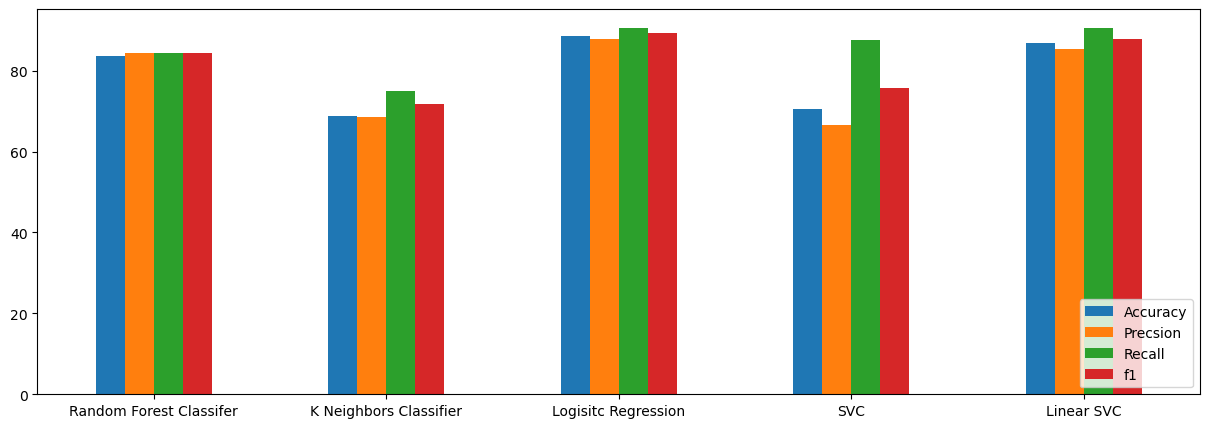

In [27]:
ax = resultDf.plot(kind='bar',figsize=(15,5),rot=0)
ax.legend(loc='lower right')
plt.show()

Quick conclusion:
The model with the best precsion score is Logistic Regression, then comes Linear SVC. Regarding accuracy, logistic regression performed the best; Linear SVC hasn't fallen behind with an accuracy lower by approximately only 2%. Since we are focusing on achieving an accuracy of at least 96% the best model to try first is Logistic Regression.

Ranking Models Based on Accuracy:
1. Logistic regression
2. Linear SVC
3. Random Forest Classifier
4. SVC
5. K Neighbors Classifier

## Trying with the first model (Logistic Regression)

In [28]:
logrgrid={"C":np.logspace(-4,4,20),
      "solver":['liblinear']}

rslogR = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=logrgrid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
np.random.seed(42)
rslogR.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rslogR.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rslogR.score(xtest,ytest)

0.8852459016393442

In [31]:
grid ={
    "C":np.logspace(-4,4,30),
    "solver":['liblinear']
}
logGSCV = GridSearchCV(LogisticRegression(),
                       param_grid=grid,
                      cv=5,
                      verbose=True)
logGSCV.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
logGSCV.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
train_scores={}
test_scores={}

train_scores["Logistic_regression"]= [rslogR.score(xtrain,ytrain),logGSCV.score(xtrain,ytrain)]
test_scores["Logistic_regression"]= [rslogR.score(xtest,ytest),logGSCV.score(xtest,ytest)]

train_scores,test_scores

({'Logistic_regression': [0.859504132231405, 0.859504132231405]},
 {'Logistic_regression': [0.8852459016393442, 0.8852459016393442]})

Conclusion: Grid Search CV did not help with improving the accuracy.

## trying KNN

In [34]:
np.random.seed(42)
neighbors = range(1,21)
knn = KNeighborsClassifier()
train_scores["knn"]=[]
test_scores["knn"]=[]
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_scores["knn"].append(knn.score(xtrain,ytrain))
    test_scores["knn"].append(knn.score(xtest,ytest))

In [35]:
train_scores['knn']

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores["knn"]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

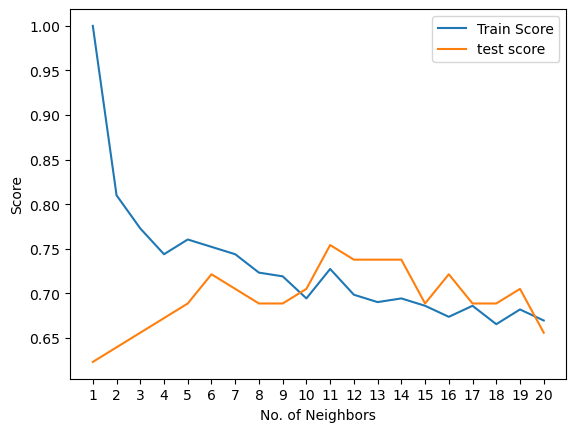

the maximum KNN score is 75.41%


In [37]:
plt.plot(neighbors,train_scores["knn"],label="Train Score")
plt.plot(neighbors,test_scores["knn"],label="test score")
plt.xlabel('No. of Neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Score')
plt.legend()
plt.show()
print(f"the maximum KNN score is {max(test_scores['knn'])*100:.2f}%")

In [38]:
train_scores['knn']=[train_scores['knn'][test_scores['knn'].index(max(test_scores['knn']))]]
test_scores['knn']=[max(test_scores['knn'])]

Tuning the number of neighbors in the KNN model has bumped up the score by 6% from about 69% to 75%. Athough the accuracy score has improved, the accuracy score is still behind the Logisitic Regression, Random Forest, and Linear SVC, which takes it out of the consideration for now

## Trying Random Forest

In [39]:
train_scores,test_scores

({'Logistic_regression': [0.859504132231405, 0.859504132231405],
  'knn': [0.7272727272727273]},
 {'Logistic_regression': [0.8852459016393442, 0.8852459016393442],
  'knn': [0.7540983606557377]})

In [40]:
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [41]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(xtest,ytest)

0.8688524590163934

The hyperparameter tuning wiht Random Search CV improved the accuracy by about 3-4%; However the Logistic Regression is still the one to go. 

In [44]:
test_scores["Random forest"]=[rs_rf.score(xtest,ytest)]
train_scores["Random forest"]=[rs_rf.score(xtrain,ytrain)]
print(f"""
test scores: {test_scores}
train scores: {train_scores}
      """)


test scores: {'Logistic_regression': [0.8852459016393442, 0.8852459016393442], 'knn': [0.7540983606557377], 'Random forest': [0.8688524590163934]}
train scores: {'Logistic_regression': [0.859504132231405, 0.859504132231405], 'knn': [0.7272727272727273], 'Random forest': [0.8553719008264463]}
      


## Evaluating the best tuned classifer

In [45]:
ypreds= logGSCV.predict(xtest)
ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
np.array(ytest)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

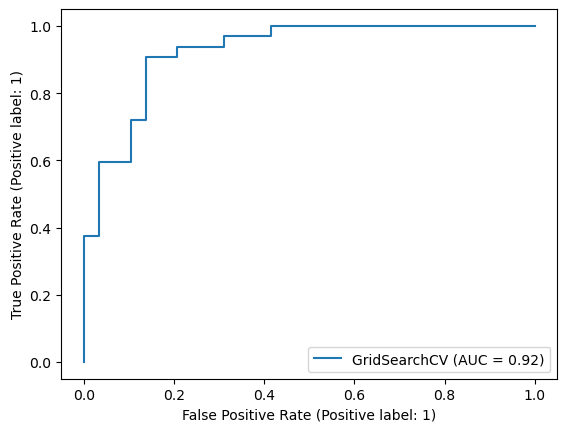

In [47]:
##plotting roc curve
RocCurveDisplay.from_estimator(logGSCV,xtest,ytest)
plt.show()

In [48]:
print(confusion_matrix(ytest,ypreds))

[[25  4]
 [ 3 29]]


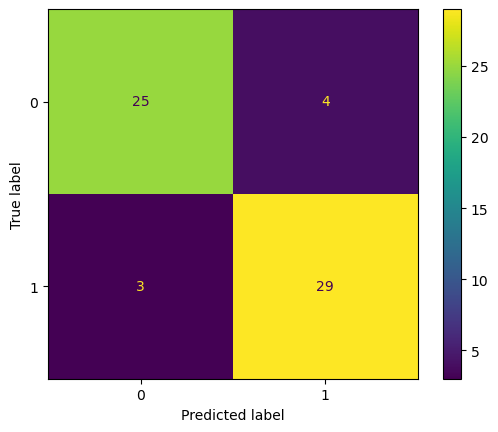

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(ytest,ypreds))
disp.plot()
plt.show()

In [50]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [51]:
#cross validating the scores
metrics ={}
scores=['accuracy','precision','recall','f1']
for score in scores:
    print(f"{score} score....")
    cscore = cross_val_score(logGSCV,x,y,scoring=score)
    metrics[score]=np.mean(cscore)
    print(np.mean(cscore))

accuracy score....
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8413661202185793
precision score....
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.82
recall score....
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling

In [52]:
metrics

{'accuracy': 0.8413661202185793,
 'precision': 0.82,
 'recall': 0.9151515151515153,
 'f1': 0.86406124093473}

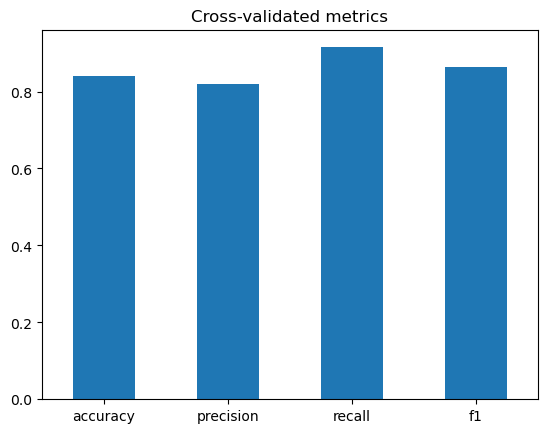

In [53]:
metframe = pd.DataFrame(metrics,index=[0])
metframe.T.plot.bar(title="Cross-validated metrics",rot=0,legend=False)
plt.show()

## Feature Importance

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
logGSCV.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
model = LogisticRegression(C=0.20433597178569418,solver='liblinear')
model.fit(xtrain,ytrain)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
model.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [58]:
feature_dict = dict(zip(df.columns,list(model.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

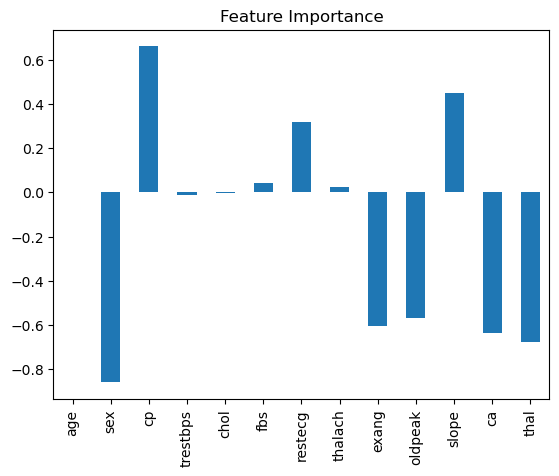

In [59]:
featureCoefDf = pd.DataFrame(feature_dict,index=[0])
featureCoefDf.T.plot.bar(title="Feature Importance",legend=False)
plt.show()

## Trying XGBoost

In [61]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
from xgboost import XGBClassifier
xgclf = GridSearchCV(XGBClassifier(),param_grid=params,n_jobs=-1,cv=5)
xgclf.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [62]:
xgclf.score(xtest,ytest)

0.8852459016393442

Even with a better classification model the best accuracy achieved is 88.5%. One solution to this issue is getting more data, then the model might perform better